In [ ]:
import os
import h5py
import numpy as np
from h5py import h5s
import torch
from dotenv import load_dotenv

load_dotenv()

DATA_ROOT = os.environ["DATA_ROOT"]

# Train/val loss

In [ ]:
import json
import matplotlib.pyplot as plt


with open("train_histories/history-U-net_base-0.json", "r") as f:
    hist_base = json.load(f)

with open("train_histories/history-U-net_enriched-0.json", "r") as f:
    hist_enriched = json.load(f)


base_train = hist_base["train_epoch_loss"]
base_val   = hist_base["val_epoch_loss"]

enr_train  = hist_enriched["train_epoch_loss"]
enr_val    = hist_enriched["val_epoch_loss"]


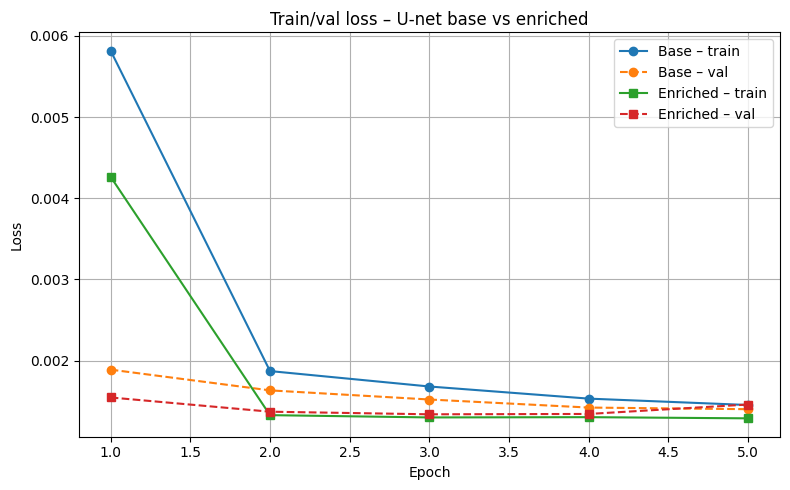

In [2]:
epochs_base = range(1, len(base_train) + 1)
epochs_enr  = range(1, len(enr_train) + 1)

plt.figure(figsize=(8, 5))

# Baseline
plt.plot(epochs_base, base_train,  marker="o", linestyle="-", label="Base – train")
plt.plot(epochs_base, base_val,    marker="o", linestyle="--", label="Base – val")

# Enriched
plt.plot(epochs_enr, enr_train,    marker="s", linestyle="-", label="Enriched – train")
plt.plot(epochs_enr, enr_val,      marker="s", linestyle="--", label="Enriched – val")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train/val loss – U-net base vs enriched")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Grids resolutions

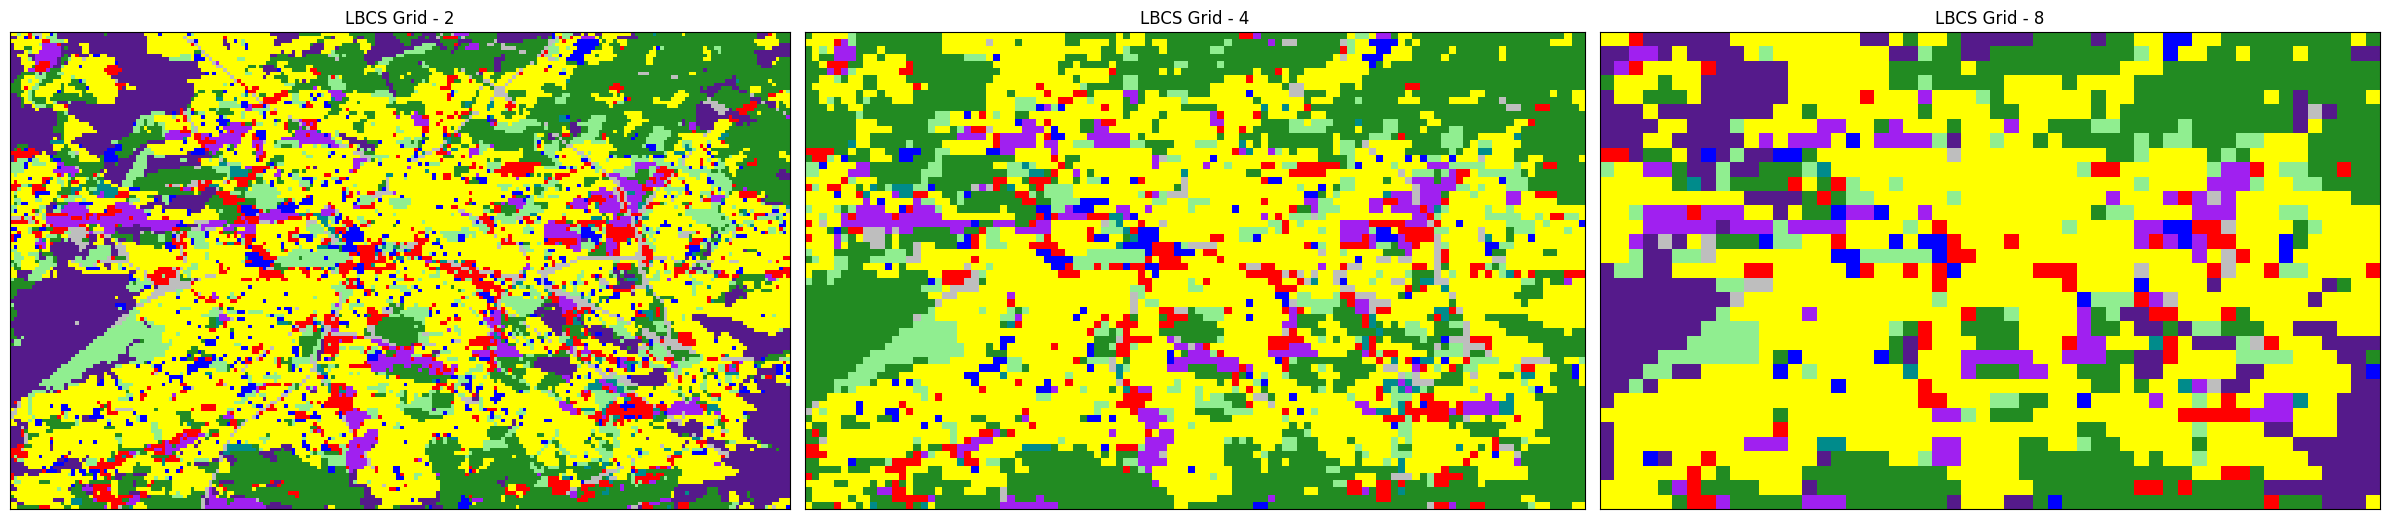

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# -------- paths --------
base_dir = os.path.join(DATA_ROOT, "BERLIN_reduced")

# -------- color map --------
LBCS_COLOR_MAP = {
    "1000": "#FFFF00",
    "2000": "#FF0000",
    "3000": "#A020F0",
    "4000": "#BEBEBE",
    "5000": "#90EE90",
    "6000": "#0000FF",
    "7000": "#008B8B",
    "8000": "#551A8B",
    "9000": "#228B22",
    "0000": "#FFFFFF"
}

def load_matrix(json_path):
    with open(json_path, "r") as f:
        matrix = json.load(f)
    return np.array(matrix)

def matrix_to_rgba(M):
    rows, cols = M.shape
    rgba_grid = np.zeros((rows, cols, 4))
    for i in range(rows):
        for j in range(cols):
            hex_color = LBCS_COLOR_MAP.get(M[i, j], "#FFFFFF")
            rgba_grid[i, j] = to_rgba(hex_color)
    return rgba_grid

# -------- discover all granularities --------
granularities = []
for name in os.listdir(base_dir):
    if name.startswith("grid_lbcs-"):
        level = name.split("-")[1]  # e.g. "4", "8", "16", etc.
        folder = os.path.join(base_dir, name)
        json_path = os.path.join(folder, "lbcs_matrix.json")
        if os.path.exists(json_path):
            granularities.append((level, json_path))

# sort levels numerically
granularities.sort(key=lambda x: int(x[0]))

# load matrices and convert
matrices = []
for level, path in granularities:
    M = load_matrix(path)
    rgba = matrix_to_rgba(M)
    matrices.append((level, rgba))

# -------- plot dynamically --------
n = len(matrices)
fig, axes = plt.subplots(1, n, figsize=(8*n, 8))

if n == 1:
    axes = [axes]  # keep iterable

for ax, (level, rgba) in zip(axes, matrices):
    ax.imshow(rgba)
    ax.set_title(f"LBCS Grid - {level}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()
